# dqn  / Sarsa PacMan gym comparisson 

In [4]:
import gym
import numpy as np 

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from rl.agents.dqn import DQNAgent
from rl.agents.ddpg import DDPGAgent
from rl.policy import BoltzmannGumbelQPolicy , LinearAnnealedPolicy , EpsGreedyQPolicy
from rl.memory import SequentialMemory

In [5]:
env = gym.make('MsPacman-v0')
nb_actions = env.action_space.n
nb_actions

9

# Neural Network Model 
agents representation of the environment

In [3]:
# Next, we build a neural network model
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(3, activation= 'tanh')) # layer 1: 3 cells with tanh activation function 
model.add(Dense(nb_actions))
model.add(Dense(6, activation= 'sigmoid')) #layer 2 : 6 cells with sigmoid activation function 
model.add(Dense(nb_actions))
model.add(Dense(6, activation= 'sigmoid')) #layer 3 : 6 cells with sigmoid activation function  
model.add(Dense(nb_actions))
model.add(Dense(6, activation= 'sigmoid')) #layer 4 : 6 cells with sigmoid activation function  
model.add(Dense(nb_actions))
model.add(Dense(3, activation= 'tanh')) #layer 5 : 3 cells with tanh activation function  
model.add(Dense(nb_actions))
model.add(Dense(3, activation= 'sigmoid')) #layer 6 : 6 cells with sigmoid activation function  
model.add(Dense(nb_actions))
model.add(Activation('softmax')) # one layer of 1 unit with sigmoid activation function
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 100800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 302403    
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 63        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 63        
__________

# DQN  Deep Reinforcement Learning 

In [4]:
#Configure and compile the agent & policy. 
memory = SequentialMemory(limit=100000, window_length=1)
policy = BoltzmannGumbelQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=50,
              target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])

In [22]:
## Visualize the training during 5000000 steps 
## Each episode is a game in wich Pacman has two lifes 
### When nb_steps is not long enough , a warning might appear 
### "Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!"

dqn.fit(env, nb_steps=100000, visualize=True, verbose=2)


Training for 100000 steps ...
   922/100000: episode: 1, duration: 29.546s, episode steps: 922, steps per second: 31, episode reward: 370.000, mean reward: 0.401 [0.000, 10.000], mean action: 3.359 [0.000, 8.000], mean observation: 72.595 [0.000, 228.000], loss: 2.750501, mean_absolute_error: 0.159018, acc: 0.409802, mean_q: 0.655422
  1355/100000: episode: 2, duration: 12.858s, episode steps: 433, steps per second: 34, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 3.009 [1.000, 6.000], mean observation: 72.910 [0.000, 228.000], loss: 1.932692, mean_absolute_error: 0.100334, acc: 0.736865, mean_q: 0.939665
  1794/100000: episode: 3, duration: 12.995s, episode steps: 439, steps per second: 34, episode reward: 60.000, mean reward: 0.137 [0.000, 10.000], mean action: 3.030 [0.000, 7.000], mean observation: 72.906 [0.000, 228.000], loss: 1.599364, mean_absolute_error: 0.077912, acc: 0.806948, mean_q: 0.964618
  2230/100000: episode: 4, duration: 13.087s, episode 

 14350/100000: episode: 28, duration: 12.788s, episode steps: 431, steps per second: 34, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 3.009 [3.000, 7.000], mean observation: 72.912 [0.000, 228.000], loss: 0.837868, mean_absolute_error: 0.025444, acc: 0.970780, mean_q: 0.999970
 14775/100000: episode: 29, duration: 12.599s, episode steps: 425, steps per second: 34, episode reward: 60.000, mean reward: 0.141 [0.000, 10.000], mean action: 3.012 [3.000, 6.000], mean observation: 72.913 [0.000, 228.000], loss: 0.885915, mean_absolute_error: 0.027345, acc: 0.966765, mean_q: 0.999976
 15202/100000: episode: 30, duration: 12.630s, episode steps: 427, steps per second: 34, episode reward: 60.000, mean reward: 0.141 [0.000, 10.000], mean action: 3.000 [0.000, 7.000], mean observation: 72.907 [0.000, 228.000], loss: 1.067898, mean_absolute_error: 0.027376, acc: 0.970653, mean_q: 0.999980
 15628/100000: episode: 31, duration: 12.637s, episode steps: 426, steps per secon

 26222/100000: episode: 55, duration: 12.969s, episode steps: 438, steps per second: 34, episode reward: 60.000, mean reward: 0.137 [0.000, 10.000], mean action: 2.993 [0.000, 3.000], mean observation: 72.908 [0.000, 228.000], loss: 0.877860, mean_absolute_error: 0.020972, acc: 0.981949, mean_q: 1.000000
 26654/100000: episode: 56, duration: 12.859s, episode steps: 432, steps per second: 34, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 3.012 [3.000, 8.000], mean observation: 72.914 [0.000, 228.000], loss: 0.893530, mean_absolute_error: 0.025140, acc: 0.978516, mean_q: 1.000000
 27184/100000: episode: 57, duration: 15.685s, episode steps: 530, steps per second: 34, episode reward: 110.000, mean reward: 0.208 [0.000, 10.000], mean action: 3.002 [3.000, 4.000], mean observation: 72.849 [0.000, 228.000], loss: 0.871484, mean_absolute_error: 0.024115, acc: 0.980837, mean_q: 1.000000
 27647/100000: episode: 58, duration: 13.676s, episode steps: 463, steps per seco

 38046/100000: episode: 82, duration: 12.966s, episode steps: 434, steps per second: 33, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 2.993 [0.000, 3.000], mean observation: 72.915 [0.000, 228.000], loss: 0.746647, mean_absolute_error: 0.020482, acc: 0.985383, mean_q: 1.000000
 38482/100000: episode: 83, duration: 12.969s, episode steps: 436, steps per second: 34, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 3.007 [2.000, 7.000], mean observation: 72.911 [0.000, 228.000], loss: 0.842648, mean_absolute_error: 0.022776, acc: 0.984088, mean_q: 1.000000
 38998/100000: episode: 84, duration: 15.467s, episode steps: 516, steps per second: 33, episode reward: 110.000, mean reward: 0.213 [0.000, 10.000], mean action: 3.010 [0.000, 8.000], mean observation: 72.853 [0.000, 228.000], loss: 0.791431, mean_absolute_error: 0.021996, acc: 0.982316, mean_q: 1.000000
 39430/100000: episode: 85, duration: 12.932s, episode steps: 432, steps per seco

 50042/100000: episode: 109, duration: 13.319s, episode steps: 428, steps per second: 32, episode reward: 60.000, mean reward: 0.140 [0.000, 10.000], mean action: 2.998 [2.000, 3.000], mean observation: 72.914 [0.000, 228.000], loss: 0.796233, mean_absolute_error: 0.021130, acc: 0.987077, mean_q: 1.000000
 50472/100000: episode: 110, duration: 13.205s, episode steps: 430, steps per second: 33, episode reward: 60.000, mean reward: 0.140 [0.000, 10.000], mean action: 3.012 [3.000, 6.000], mean observation: 72.909 [0.000, 228.000], loss: 0.958833, mean_absolute_error: 0.023197, acc: 0.987064, mean_q: 1.000000
 51182/100000: episode: 111, duration: 21.496s, episode steps: 710, steps per second: 33, episode reward: 780.000, mean reward: 1.099 [0.000, 400.000], mean action: 3.023 [3.000, 8.000], mean observation: 72.878 [0.000, 228.000], loss: 1.750635, mean_absolute_error: 0.022866, acc: 0.987192, mean_q: 1.000000
 51616/100000: episode: 112, duration: 12.981s, episode steps: 434, steps per

 62241/100000: episode: 136, duration: 12.967s, episode steps: 434, steps per second: 33, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.908 [0.000, 228.000], loss: 0.739101, mean_absolute_error: 0.019514, acc: 0.989127, mean_q: 1.000000
 62688/100000: episode: 137, duration: 13.364s, episode steps: 447, steps per second: 33, episode reward: 60.000, mean reward: 0.134 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.911 [0.000, 228.000], loss: 0.831790, mean_absolute_error: 0.021591, acc: 0.988465, mean_q: 1.000000
 63121/100000: episode: 138, duration: 13.000s, episode steps: 433, steps per second: 33, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.914 [0.000, 228.000], loss: 7.999557, mean_absolute_error: 0.025455, acc: 0.988380, mean_q: 1.000000
 63546/100000: episode: 139, duration: 13.515s, episode steps: 425, steps per s

 74051/100000: episode: 163, duration: 13.276s, episode steps: 436, steps per second: 33, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.911 [0.000, 228.000], loss: 6.441117, mean_absolute_error: 0.021877, acc: 0.989822, mean_q: 1.000000
 74488/100000: episode: 164, duration: 13.053s, episode steps: 437, steps per second: 33, episode reward: 60.000, mean reward: 0.137 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.909 [0.000, 228.000], loss: 0.819825, mean_absolute_error: 0.021008, acc: 0.990346, mean_q: 1.000000
 74921/100000: episode: 165, duration: 13.294s, episode steps: 433, steps per second: 33, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 2.998 [0.000, 5.000], mean observation: 72.913 [0.000, 228.000], loss: 0.865574, mean_absolute_error: 0.022025, acc: 0.990257, mean_q: 1.000000
 75354/100000: episode: 166, duration: 13.565s, episode steps: 433, steps per s

 85917/100000: episode: 190, duration: 13.049s, episode steps: 429, steps per second: 33, episode reward: 60.000, mean reward: 0.140 [0.000, 10.000], mean action: 2.998 [2.000, 3.000], mean observation: 72.909 [0.000, 228.000], loss: 0.760346, mean_absolute_error: 0.019699, acc: 0.989948, mean_q: 1.000000
 86352/100000: episode: 191, duration: 13.272s, episode steps: 435, steps per second: 33, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 3.002 [3.000, 4.000], mean observation: 72.912 [0.000, 228.000], loss: 0.691576, mean_absolute_error: 0.017892, acc: 0.991882, mean_q: 1.000000
 86777/100000: episode: 192, duration: 12.884s, episode steps: 425, steps per second: 33, episode reward: 60.000, mean reward: 0.141 [0.000, 10.000], mean action: 2.998 [2.000, 3.000], mean observation: 72.913 [0.000, 228.000], loss: 0.688200, mean_absolute_error: 0.018250, acc: 0.989853, mean_q: 1.000000
 87199/100000: episode: 193, duration: 12.817s, episode steps: 422, steps per s

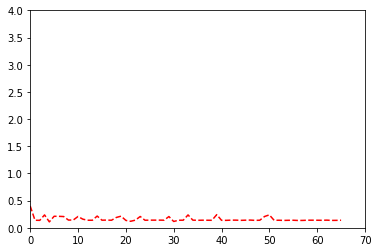

In [21]:
## Plot mean_reward 
episodes = list(range(0, 66))
mean_reward = [0.401,0.139,0.137,0.237,0.109,0.212,0.211,0.207,0.142,0.143,0.208,
              0.159,0.139,0.139,0.216,0.140,0.142,0.139,0.190,0.214,0.136,0.120,
              0.141,0.208,0.139,0.141,0.141,0.141,0.140,0.207,0.116,0.139,0.140,
              0.237,0.141,0.138,0.140,0.139,0.138,0.242,0.138,0.137,0.141,0.141,
              0.137,0.140,0.142,0.137,0.139,0.208,0.238,0.138,0.139,0.136,0.138,
              0.139,0.135,0.136,0.140,0.140,0.139,0.138,0.141,0.136,0.137,0.139]

plt.plot(episodes, mean_reward, 'r--')
plt.axis([0, 70, 0, 4])
plt.show()

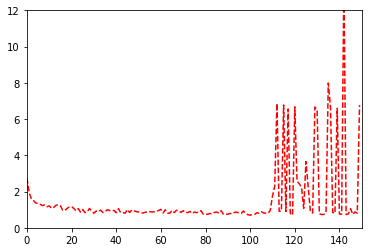

150

In [42]:
## Plot loss and accuracy 
episodes = list(range(0, 150))

loss = [2.750,1.9326,1.599,1.4933,1.3641,1.3544,1.2858,1.2228,1.2695,1.165,1.2079,
        1.0799,1.1265,1.242,1.2760,1.219,0.966,0.9580,1.0700,1.1492,1.1680,1.0672,
        0.9353,1.0579,0.8656,1.0098,0.837,0.8859,1.0678,0.9264,0.8049,0.9255,0.8928,
        0.9739,0.8459,0.8857,0.9969,0.9506,0.9345,0.960219,0.831869,1.0556, 0.8367,
        0.8366,0.8056,1.006,0.8444,0.983,0.9342,0.8919,0.8765,0.8173,0.8173,0.8597,
        0.877,0.8935,0.8714,0.8827,0.9247,0.9506,1.0173,0.8194,0.9933,0.8126,0.8047,
        0.9586,0.8423,0.969,0.9432,0.8538,0.9458,0.8530,0.8371,0.9035,0.7926,0.8675,
        0.8354,0.8754, 0.9470,0.7485,0.7522,0.7466,0.7914,0.7704,0.8512,0.8665,0.8145,
        0.9470,0.7485,0.7522,0.7466,0.7914,0.7704,0.8512,0.8665,0.8145,0.7918,0.9274,
        0.7951, 0.7180,0.6970,0.7397, 0.7380,0.8324,0.7980,0.8889, 0.8174, 0.8040,0.796,
        0.9588, 1.750, 2.289, 6.869,0.908,0.927,6.778,0.895,6.555,0.788,0.701,6.674,2.567,
        2.43,2.234,1.070,3.657,2.296,0.889,0.8122,6.668,6.516,0.774, 0.730,0.739,0.831,7.99,
        6.665,0.847,0.801,6.596,0.756,0.754,13.629,0.728,0.771,1.055,0.734,0.879,0.810,6.769]

plt.plot(episodes, loss, 'r--')
plt.axis([0, 150, 0, 12])
plt.show()
len(loss)


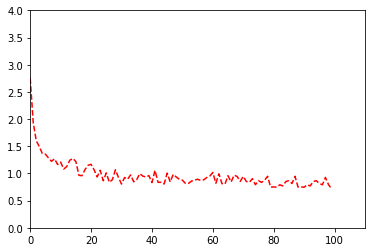

100

In [49]:
## Plot loss and accuracy por 100 episodes, Loss is decrasing and accuracy is growing during the first 100 episodes 
episodes = list(range(0, 100))

loss_Bolzman = [2.750,1.9326,1.599,1.4933,1.3641,1.3544,1.2858,1.2228,1.2695,1.165,1.2079,
        1.0799,1.1265,1.242,1.2760,1.219,0.966,0.9580,1.0700,1.1492,1.1680,1.0672,
        0.9353,1.0579,0.8656,1.0098,0.837,0.8859,1.0678,0.9264,0.8049,0.9255,0.8928,
        0.9739,0.8459,0.8857,0.9969,0.9506,0.9345,0.960219,0.831869,1.0556, 0.8367,
        0.8366,0.8056,1.006,0.8444,0.983,0.9342,0.8919,0.8765,0.8173,0.8173,0.8597,
        0.877,0.8935,0.8714,0.8827,0.9247,0.9506,1.0173,0.8194,0.9933,0.8126,0.8047,
        0.9586,0.8423,0.969,0.9432,0.8538,0.9458,0.8530,0.8371,0.9035,0.7926,0.8675,
        0.8354,0.8754, 0.9470,0.7485,0.7522,0.7466,0.7914,0.7704,0.8512,0.8665,0.8145,
        0.9470,0.7485,0.7522,0.7466,0.7914,0.7704,0.8512,0.8665,0.8145,0.7918,0.9274,
        0.7951, 0.7180]

plt.plot(episodes, loss_Bolzman, 'r--')
plt.axis([0, 110, 0, 4])
plt.show()
len(loss)

In [43]:
# Evaluate the algorithm for 10 episodes 
dqn.test(env, nb_episodes=10, visualize=True)

Testing for 10 episodes ...
Episode 1: reward: 210.000, steps: 488
Episode 2: reward: 210.000, steps: 502
Episode 3: reward: 210.000, steps: 490
Episode 4: reward: 210.000, steps: 499
Episode 5: reward: 210.000, steps: 499
Episode 6: reward: 210.000, steps: 507
Episode 7: reward: 210.000, steps: 502
Episode 8: reward: 210.000, steps: 508
Episode 9: reward: 210.000, steps: 498
Episode 10: reward: 210.000, steps: 490


In [25]:
## Save the weights of an agent from a HDF5 file
dqn.save_weights('dqn_{}_weights.h5f'.format(env), overwrite=True)
## Load the weights of an agent from an HDF5 file 
dqn.load_weights('dqn_{}_weights.h5f')

In [ ]:
## Information about the agent  (https://github.com/matthiasplappert/keras-rl/blob/master/rl/core.py)
dqn.metrics_names()
dqn.layers()

## Conclusion DQN-Agent

#### The DQN agent with Neural Network model and Boltzmann Gumbel Q Policy
#### shows stable learning during training the first 100 episodes. Mean-reward grows in the test from the beggining 
#### The test reward comes the highest of the experiment 

In [5]:
#SARSA Agent -- Reinforcement Learning with no policy 
from rl.agents.sarsa import SARSAAgent
sarsa = SARSAAgent(model, nb_actions, 
                policy=None, test_policy=None, 
                gamma=0.99, nb_steps_warmup=10, 
                train_interval=1)
sarsa.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])
sarsa.fit(env, nb_steps=100000, visualize=True, verbose=2)
sarsa.test(env, nb_episodes=10, visualize=True)

Training for 100000 steps ...
   966/100000: episode: 1, duration: 19.852s, episode steps: 966, steps per second: 49, episode reward: 440.000, mean reward: 0.455 [0.000, 200.000], mean action: 7.621 [0.000, 8.000], mean observation: 72.770 [0.000, 228.000], loss: 23.349495, mean_absolute_error: 0.133976, acc: 0.910995, mean_q: 0.321679
  2220/100000: episode: 2, duration: 20.781s, episode steps: 1254, steps per second: 60, episode reward: 440.000, mean reward: 0.351 [0.000, 200.000], mean action: 7.652 [0.000, 8.000], mean observation: 72.743 [0.000, 228.000], loss: 17.760113, mean_absolute_error: 0.094084, acc: 0.919393, mean_q: 0.646693
  3085/100000: episode: 3, duration: 7.325s, episode steps: 865, steps per second: 118, episode reward: 460.000, mean reward: 0.532 [0.000, 200.000], mean action: 7.603 [0.000, 8.000], mean observation: 72.896 [0.000, 228.000], loss: 25.900519, mean_absolute_error: 0.109459, acc: 0.906250, mean_q: 0.724962
  3920/100000: episode: 4, duration: 6.853s, 

 25683/100000: episode: 28, duration: 4.560s, episode steps: 567, steps per second: 124, episode reward: 190.000, mean reward: 0.335 [0.000, 10.000], mean action: 7.630 [0.000, 8.000], mean observation: 72.795 [0.000, 228.000], loss: 1.711272, mean_absolute_error: 0.066766, acc: 0.904594, mean_q: 0.999385
 26702/100000: episode: 29, duration: 7.994s, episode steps: 1019, steps per second: 127, episode reward: 450.000, mean reward: 0.442 [0.000, 210.000], mean action: 7.610 [0.000, 8.000], mean observation: 72.756 [0.000, 228.000], loss: 23.866865, mean_absolute_error: 0.076911, acc: 0.910609, mean_q: 0.999505
 27526/100000: episode: 30, duration: 6.403s, episode steps: 824, steps per second: 129, episode reward: 520.000, mean reward: 0.631 [0.000, 200.000], mean action: 7.714 [0.000, 8.000], mean observation: 72.666 [0.000, 228.000], loss: 27.502925, mean_absolute_error: 0.091450, acc: 0.935601, mean_q: 0.999648
 28375/100000: episode: 31, duration: 6.663s, episode steps: 849, steps pe

 46962/100000: episode: 55, duration: 3.957s, episode steps: 515, steps per second: 130, episode reward: 110.000, mean reward: 0.214 [0.000, 10.000], mean action: 7.555 [0.000, 8.000], mean observation: 72.866 [0.000, 228.000], loss: 1.142107, mean_absolute_error: 0.055873, acc: 0.900778, mean_q: 0.999999
 47846/100000: episode: 56, duration: 7.034s, episode steps: 884, steps per second: 126, episode reward: 240.000, mean reward: 0.271 [0.000, 50.000], mean action: 7.538 [0.000, 8.000], mean observation: 72.806 [0.000, 228.000], loss: 2.629218, mean_absolute_error: 0.063533, acc: 0.892412, mean_q: 0.999999
 48636/100000: episode: 57, duration: 6.133s, episode steps: 790, steps per second: 129, episode reward: 920.000, mean reward: 1.165 [0.000, 400.000], mean action: 7.600 [0.000, 8.000], mean observation: 72.732 [0.000, 228.000], loss: 130.072215, mean_absolute_error: 0.158051, acc: 0.910013, mean_q: 0.999999
 49211/100000: episode: 58, duration: 4.527s, episode steps: 575, steps per 

 69968/100000: episode: 82, duration: 6.078s, episode steps: 785, steps per second: 129, episode reward: 450.000, mean reward: 0.573 [0.000, 200.000], mean action: 7.618 [0.000, 8.000], mean observation: 72.775 [0.000, 228.000], loss: 28.480391, mean_absolute_error: 0.087428, acc: 0.922194, mean_q: 1.000000
 70897/100000: episode: 83, duration: 7.275s, episode steps: 929, steps per second: 128, episode reward: 840.000, mean reward: 0.904 [0.000, 400.000], mean action: 7.635 [0.000, 8.000], mean observation: 72.838 [0.000, 228.000], loss: 110.639460, mean_absolute_error: 0.127834, acc: 0.917026, mean_q: 1.000000
 71913/100000: episode: 84, duration: 8.216s, episode steps: 1016, steps per second: 124, episode reward: 250.000, mean reward: 0.246 [0.000, 50.000], mean action: 7.594 [0.000, 8.000], mean observation: 72.821 [0.000, 228.000], loss: 2.298804, mean_absolute_error: 0.057479, acc: 0.903448, mean_q: 1.000000
 72995/100000: episode: 85, duration: 8.460s, episode steps: 1082, steps 

 94361/100000: episode: 109, duration: 6.602s, episode steps: 841, steps per second: 127, episode reward: 330.000, mean reward: 0.392 [0.000, 50.000], mean action: 7.633 [0.000, 8.000], mean observation: 72.638 [0.000, 228.000], loss: 3.195201, mean_absolute_error: 0.067343, acc: 0.922619, mean_q: 1.000000
 94903/100000: episode: 110, duration: 4.239s, episode steps: 542, steps per second: 128, episode reward: 200.000, mean reward: 0.369 [0.000, 10.000], mean action: 7.683 [0.000, 8.000], mean observation: 72.835 [0.000, 228.000], loss: 1.897125, mean_absolute_error: 0.065492, acc: 0.920518, mean_q: 1.000000
 95480/100000: episode: 111, duration: 4.534s, episode steps: 577, steps per second: 127, episode reward: 150.000, mean reward: 0.260 [0.000, 10.000], mean action: 7.624 [0.000, 8.000], mean observation: 72.871 [0.000, 228.000], loss: 1.386677, mean_absolute_error: 0.058260, acc: 0.909722, mean_q: 1.000000
 96189/100000: episode: 112, duration: 5.534s, episode steps: 709, steps per

## Conclusion State-Action-Reward agent

#### The State-action-Reward agent with Neural Network model and no policy
#### shows unstable learning during episodes. 
#### The test reward comes at 70 and the duration of the episode is low ( the agent doesn´t play for much time)


In [6]:
sarsa = SARSAAgent(model, nb_actions, 
                policy=policy, test_policy=None, 
                gamma=0.99, nb_steps_warmup=10, 
                train_interval=1)
sarsa.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])
sarsa.fit(env, nb_steps=100000, visualize=True, verbose=2)
sarsa.test(env, nb_episodes=10, visualize=True)

Training for 100000 steps ...
   789/100000: episode: 1, duration: 8.591s, episode steps: 789, steps per second: 92, episode reward: 270.000, mean reward: 0.342 [0.000, 50.000], mean action: 7.024 [0.000, 8.000], mean observation: 72.821 [0.000, 228.000], loss: 3.280811, mean_absolute_error: 0.095194, acc: 0.786632, mean_q: 1.000000
  1790/100000: episode: 2, duration: 7.855s, episode steps: 1001, steps per second: 127, episode reward: 570.000, mean reward: 0.569 [0.000, 200.000], mean action: 7.797 [0.000, 8.000], mean observation: 72.541 [0.000, 228.000], loss: 22.827030, mean_absolute_error: 0.077349, acc: 0.954000, mean_q: 1.000000
  2623/100000: episode: 3, duration: 6.634s, episode steps: 833, steps per second: 126, episode reward: 840.000, mean reward: 1.008 [0.000, 400.000], mean action: 7.819 [0.000, 8.000], mean observation: 72.809 [0.000, 228.000], loss: 122.849101, mean_absolute_error: 0.124602, acc: 0.962740, mean_q: 1.000000
  3374/100000: episode: 4, duration: 5.933s, ep

 21581/100000: episode: 28, duration: 7.471s, episode steps: 947, steps per second: 127, episode reward: 440.000, mean reward: 0.465 [0.000, 200.000], mean action: 7.957 [0.000, 8.000], mean observation: 72.800 [0.000, 228.000], loss: 23.473624, mean_absolute_error: 0.056346, acc: 0.988372, mean_q: 1.000000
 22426/100000: episode: 29, duration: 6.663s, episode steps: 845, steps per second: 127, episode reward: 840.000, mean reward: 0.994 [0.000, 400.000], mean action: 7.981 [0.000, 8.000], mean observation: 72.795 [0.000, 228.000], loss: 121.085431, mean_absolute_error: 0.113332, acc: 0.994076, mean_q: 1.000000
 23047/100000: episode: 30, duration: 4.883s, episode steps: 621, steps per second: 127, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.994 [4.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.565840, mean_absolute_error: 0.014341, acc: 0.996774, mean_q: 1.000000
 23664/100000: episode: 31, duration: 4.853s, episode steps: 617, steps per

 40534/100000: episode: 55, duration: 5.144s, episode steps: 635, steps per second: 123, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 7.992 [3.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.553346, mean_absolute_error: 0.014048, acc: 0.996845, mean_q: 1.000000
 41166/100000: episode: 56, duration: 5.067s, episode steps: 632, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 41784/100000: episode: 57, duration: 4.906s, episode steps: 618, steps per second: 126, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.990 [2.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.584799, mean_absolute_error: 0.014408, acc: 0.996759, mean_q: 1.000000
 42415/100000: episode: 58, duration: 5.117s, episode steps: 631, steps per second

 57801/100000: episode: 82, duration: 5.387s, episode steps: 680, steps per second: 126, episode reward: 100.000, mean reward: 0.147 [0.000, 10.000], mean action: 7.997 [6.000, 8.000], mean observation: 72.906 [0.000, 228.000], loss: 0.737148, mean_absolute_error: 0.018090, acc: 0.997054, mean_q: 1.000000
 58429/100000: episode: 83, duration: 4.997s, episode steps: 628, steps per second: 126, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.990 [2.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.559523, mean_absolute_error: 0.014193, acc: 0.996810, mean_q: 1.000000
 59050/100000: episode: 84, duration: 4.890s, episode steps: 621, steps per second: 127, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.564243, mean_absolute_error: 0.013808, acc: 0.998387, mean_q: 1.000000
 59677/100000: episode: 85, duration: 4.933s, episode steps: 627, steps per secon

 75216/100000: episode: 109, duration: 4.820s, episode steps: 612, steps per second: 127, episode reward: 70.000, mean reward: 0.114 [0.000, 10.000], mean action: 7.990 [2.000, 8.000], mean observation: 72.893 [0.000, 228.000], loss: 0.574174, mean_absolute_error: 0.014535, acc: 0.996727, mean_q: 1.000000
 75844/100000: episode: 110, duration: 4.956s, episode steps: 628, steps per second: 127, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 76463/100000: episode: 111, duration: 4.880s, episode steps: 619, steps per second: 127, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.997 [7.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.569273, mean_absolute_error: 0.014917, acc: 0.995146, mean_q: 1.000000
 77085/100000: episode: 112, duration: 4.921s, episode steps: 622, steps per se

 93168/100000: episode: 136, duration: 4.948s, episode steps: 628, steps per second: 127, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.994 [4.000, 8.000], mean observation: 72.894 [0.000, 228.000], loss: 0.559523, mean_absolute_error: 0.014193, acc: 0.996810, mean_q: 1.000000
 93796/100000: episode: 137, duration: 4.945s, episode steps: 628, steps per second: 127, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.987 [0.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.559523, mean_absolute_error: 0.014193, acc: 0.996810, mean_q: 1.000000
 94433/100000: episode: 138, duration: 5.023s, episode steps: 637, steps per second: 127, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 7.998 [7.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.536040, mean_absolute_error: 0.013662, acc: 0.996855, mean_q: 1.000000
 95050/100000: episode: 139, duration: 5.681s, episode steps: 617, steps per se

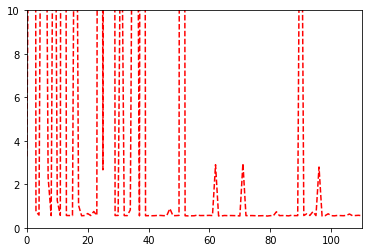

In [26]:
## Plot loss and accuracy por 100 episodes, Loss is decrasing and accuracy is growing during the first 100 episodes 
## The reward seems to be the same but the loss function gets smaller 
episodes = list(range(0, 144))

loss_Sarsa_Bolzman = [3.28,22.82,122.84,0.744,0.585,26.28,24.78,2.308,0.561,25.376,
               1.2509,0.571,110.953,0.565,0.563,0.563,26.851,1.032,0.554,0.565,
               0.656,0.563,0.751,0.570,96.41,2.667,87.50,23.47,121.085,0.565,0.569,
               17.62,0.562,0.560,0.825,23.69,26.398,0.551,102.505,0.555,0.559,0.554,
               0.558,0.569,0.568,0.557,0.567,0.884,0.560,0.560,0.570,117.603,0.554,
               0.548,0.553,0.554,0.584,0.563,0.563,0.566,0.571,0.563,2.901,0.545,0.550,
               0.566,0.558,0.564,0.560,0.557,0.546,2.965,0.559,0.562,0.562,0.557,0.551,
               0.557,0.560,0.541,0.559,0.555,0.737,0.559,0.564,0.561,0.549,0.578,0.560,
               0.561,23.818,0.564,0.645,0.568,0.743,0.561, 2.795,0.543,0.558,0.644,0.559,
               0.550,0.567,0.562,0.556,0.570,0.634,0.556,0.563,0.574,0.557,0.569,108.60,
               0.566,0.556,0.578,25.339,0.555,0.558,0.557,0.558,0.563,0.559,0.565,0.564,
               0.564,0.561,0.555,0.560,19.557,0.568,0.570,0.560,0.559,0.559,0.536,0.569,
               0.552,0.546,0.561,0.562,0.556,0.552,0.544]

plt.plot(episodes, loss_Sarsa_Bolzman, 'r--')
plt.axis([0, 110, 0, 10])
plt.show()

# Conclusion State-Action-Reward agent

#### The State-action-Reward agent with Neural Network model and  Boltzmann Gumbel Q Policy
#### shows unstable learning during episodes. 
#### The test reward comes at 70 . Try more episodes in order to test better learning 

In [7]:
sarsa = SARSAAgent(model, nb_actions, 
                policy=policy, test_policy=None, 
                gamma=0.99, nb_steps_warmup=10, 
                train_interval=1)
sarsa.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])
sarsa.fit(env, nb_steps=1000000, visualize=True, verbose=2)
sarsa.test(env, nb_episodes=10, visualize=True)

Training for 1000000 steps ...
    777/1000000: episode: 1, duration: 8.665s, episode steps: 777, steps per second: 90, episode reward: 230.000, mean reward: 0.296 [0.000, 50.000], mean action: 7.069 [0.000, 8.000], mean observation: 72.865 [0.000, 228.000], loss: 2.938891, mean_absolute_error: 0.084981, acc: 0.802872, mean_q: 1.000000
   1743/1000000: episode: 2, duration: 7.822s, episode steps: 966, steps per second: 123, episode reward: 450.000, mean reward: 0.466 [0.000, 200.000], mean action: 7.844 [0.000, 8.000], mean observation: 72.801 [0.000, 228.000], loss: 23.077522, mean_absolute_error: 0.064501, acc: 0.962694, mean_q: 1.000000
   2818/1000000: episode: 3, duration: 8.631s, episode steps: 1075, steps per second: 125, episode reward: 240.000, mean reward: 0.223 [0.000, 50.000], mean action: 7.829 [0.000, 8.000], mean observation: 72.808 [0.000, 228.000], loss: 2.101268, mean_absolute_error: 0.038194, acc: 0.960894, mean_q: 1.000000
   3425/1000000: episode: 4, duration: 4.91

  19476/1000000: episode: 28, duration: 5.024s, episode steps: 627, steps per second: 125, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 7.987 [3.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.561999, mean_absolute_error: 0.014741, acc: 0.995208, mean_q: 1.000000
  20181/1000000: episode: 29, duration: 5.674s, episode steps: 705, steps per second: 124, episode reward: 100.000, mean reward: 0.142 [0.000, 10.000], mean action: 7.974 [1.000, 8.000], mean observation: 72.934 [0.000, 228.000], loss: 0.713785, mean_absolute_error: 0.018425, acc: 0.994318, mean_q: 1.000000
  20809/1000000: episode: 30, duration: 5.042s, episode steps: 628, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.992 [3.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.559523, mean_absolute_error: 0.014193, acc: 0.996810, mean_q: 1.000000
  21442/1000000: episode: 31, duration: 5.079s, episode steps: 633, steps p

  37608/1000000: episode: 55, duration: 4.946s, episode steps: 620, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.979 [0.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.568353, mean_absolute_error: 0.014895, acc: 0.995153, mean_q: 1.000000
  38223/1000000: episode: 56, duration: 4.909s, episode steps: 615, steps per second: 125, episode reward: 70.000, mean reward: 0.114 [0.000, 10.000], mean action: 7.985 [3.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.572981, mean_absolute_error: 0.015007, acc: 0.995114, mean_q: 1.000000
  38838/1000000: episode: 57, duration: 4.982s, episode steps: 615, steps per second: 123, episode reward: 70.000, mean reward: 0.114 [0.000, 10.000], mean action: 7.998 [7.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.571369, mean_absolute_error: 0.014470, acc: 0.996743, mean_q: 1.000000
  39677/1000000: episode: 58, duration: 6.716s, episode steps: 839, steps pe

  56203/1000000: episode: 82, duration: 5.093s, episode steps: 633, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.991 [3.000, 8.000], mean observation: 72.894 [0.000, 228.000], loss: 0.556664, mean_absolute_error: 0.014611, acc: 0.995253, mean_q: 1.000000
  56836/1000000: episode: 83, duration: 5.085s, episode steps: 633, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.893 [0.000, 228.000], loss: 0.553531, mean_absolute_error: 0.013567, acc: 0.998418, mean_q: 1.000000
  57452/1000000: episode: 84, duration: 4.944s, episode steps: 616, steps per second: 125, episode reward: 90.000, mean reward: 0.146 [0.000, 10.000], mean action: 7.987 [2.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.734326, mean_absolute_error: 0.018591, acc: 0.995122, mean_q: 1.000000
  58075/1000000: episode: 85, duration: 5.017s, episode steps: 623, steps pe

  73642/1000000: episode: 109, duration: 5.542s, episode steps: 634, steps per second: 114, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.552657, mean_absolute_error: 0.013547, acc: 0.998420, mean_q: 1.000000
  74276/1000000: episode: 110, duration: 5.082s, episode steps: 634, steps per second: 125, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.552657, mean_absolute_error: 0.013547, acc: 0.998420, mean_q: 1.000000
  74896/1000000: episode: 111, duration: 5.017s, episode steps: 620, steps per second: 124, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.565155, mean_absolute_error: 0.013829, acc: 0.998384, mean_q: 1.000000
  75523/1000000: episode: 112, duration: 5.050s, episode steps: 627, step

  91096/1000000: episode: 136, duration: 5.037s, episode steps: 630, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.556171, mean_absolute_error: 0.013627, acc: 0.998410, mean_q: 1.000000
  91723/1000000: episode: 137, duration: 5.036s, episode steps: 627, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 7.994 [4.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.560417, mean_absolute_error: 0.014214, acc: 0.996805, mean_q: 1.000000
  92359/1000000: episode: 138, duration: 5.092s, episode steps: 636, steps per second: 125, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.550916, mean_absolute_error: 0.013508, acc: 0.998425, mean_q: 1.000000
  92990/1000000: episode: 139, duration: 5.032s, episode steps: 631, step

 108213/1000000: episode: 163, duration: 5.382s, episode steps: 631, steps per second: 117, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.989 [1.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.556859, mean_absolute_error: 0.014131, acc: 0.996825, mean_q: 1.000000
 108848/1000000: episode: 164, duration: 5.602s, episode steps: 635, steps per second: 113, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 7.989 [1.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.553346, mean_absolute_error: 0.014048, acc: 0.996845, mean_q: 1.000000
 109475/1000000: episode: 165, duration: 5.399s, episode steps: 627, steps per second: 116, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.558836, mean_absolute_error: 0.013687, acc: 0.998403, mean_q: 1.000000
 110103/1000000: episode: 166, duration: 5.044s, episode steps: 628, step

 126732/1000000: episode: 190, duration: 4.970s, episode steps: 621, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.564243, mean_absolute_error: 0.013808, acc: 0.998387, mean_q: 1.000000
 127353/1000000: episode: 191, duration: 4.976s, episode steps: 621, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.995 [5.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.565840, mean_absolute_error: 0.014341, acc: 0.996774, mean_q: 1.000000
 127972/1000000: episode: 192, duration: 4.972s, episode steps: 619, steps per second: 124, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.982 [2.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.569273, mean_absolute_error: 0.014917, acc: 0.995146, mean_q: 1.000000
 128593/1000000: episode: 193, duration: 4.968s, episode steps: 621, step

 144551/1000000: episode: 217, duration: 5.366s, episode steps: 634, steps per second: 118, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.552657, mean_absolute_error: 0.013547, acc: 0.998420, mean_q: 1.000000
 145178/1000000: episode: 218, duration: 5.035s, episode steps: 627, steps per second: 125, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 0.558836, mean_absolute_error: 0.013687, acc: 0.998403, mean_q: 1.000000
 145814/1000000: episode: 219, duration: 5.123s, episode steps: 636, steps per second: 124, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 7.991 [2.000, 8.000], mean observation: 72.883 [0.000, 228.000], loss: 0.552475, mean_absolute_error: 0.014028, acc: 0.996850, mean_q: 1.000000
 146450/1000000: episode: 220, duration: 5.547s, episode steps: 636, step

 161535/1000000: episode: 244, duration: 5.120s, episode steps: 639, steps per second: 125, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.548326, mean_absolute_error: 0.013450, acc: 0.998433, mean_q: 1.000000
 162174/1000000: episode: 245, duration: 5.199s, episode steps: 639, steps per second: 123, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 7.994 [4.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.549877, mean_absolute_error: 0.013967, acc: 0.996865, mean_q: 1.000000
 162814/1000000: episode: 246, duration: 5.545s, episode steps: 640, steps per second: 115, episode reward: 70.000, mean reward: 0.109 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.894 [0.000, 228.000], loss: 0.547468, mean_absolute_error: 0.013431, acc: 0.998435, mean_q: 1.000000
 163444/1000000: episode: 247, duration: 5.089s, episode steps: 630, step

 179841/1000000: episode: 271, duration: 5.042s, episode steps: 618, steps per second: 123, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.998 [7.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.568591, mean_absolute_error: 0.014405, acc: 0.996759, mean_q: 1.000000
 180471/1000000: episode: 272, duration: 5.093s, episode steps: 630, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.556171, mean_absolute_error: 0.013627, acc: 0.998410, mean_q: 1.000000
 181092/1000000: episode: 273, duration: 5.049s, episode steps: 621, steps per second: 123, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.564243, mean_absolute_error: 0.013808, acc: 0.998387, mean_q: 1.000000
 181718/1000000: episode: 274, duration: 5.399s, episode steps: 626, step

 197324/1000000: episode: 298, duration: 5.166s, episode steps: 642, steps per second: 124, episode reward: 70.000, mean reward: 0.109 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.545760, mean_absolute_error: 0.013392, acc: 0.998440, mean_q: 1.000000
 197959/1000000: episode: 299, duration: 5.185s, episode steps: 635, steps per second: 122, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.551785, mean_absolute_error: 0.013528, acc: 0.998423, mean_q: 1.000000
 198574/1000000: episode: 300, duration: 4.956s, episode steps: 615, steps per second: 124, episode reward: 80.000, mean reward: 0.130 [0.000, 10.000], mean action: 7.997 [6.000, 8.000], mean observation: 72.901 [0.000, 228.000], loss: 0.652639, mean_absolute_error: 0.016276, acc: 0.996743, mean_q: 1.000000
 199195/1000000: episode: 301, duration: 4.992s, episode steps: 621, step

 214472/1000000: episode: 325, duration: 4.930s, episode steps: 611, steps per second: 124, episode reward: 70.000, mean reward: 0.115 [0.000, 10.000], mean action: 7.992 [3.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.575115, mean_absolute_error: 0.014557, acc: 0.996721, mean_q: 1.000000
 215094/1000000: episode: 326, duration: 5.080s, episode steps: 622, steps per second: 122, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.992 [3.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.564929, mean_absolute_error: 0.014319, acc: 0.996779, mean_q: 1.000000
 215731/1000000: episode: 327, duration: 5.299s, episode steps: 637, steps per second: 120, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.550050, mean_absolute_error: 0.013489, acc: 0.998428, mean_q: 1.000000
 216368/1000000: episode: 328, duration: 5.182s, episode steps: 637, step

 231431/1000000: episode: 352, duration: 5.101s, episode steps: 628, steps per second: 123, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 232075/1000000: episode: 353, duration: 5.187s, episode steps: 644, steps per second: 124, episode reward: 70.000, mean reward: 0.109 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.544062, mean_absolute_error: 0.013354, acc: 0.998445, mean_q: 1.000000
 232705/1000000: episode: 354, duration: 5.275s, episode steps: 630, steps per second: 119, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.998 [7.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.557745, mean_absolute_error: 0.014151, acc: 0.996820, mean_q: 1.000000
 233340/1000000: episode: 355, duration: 5.577s, episode steps: 635, step

 248430/1000000: episode: 379, duration: 5.024s, episode steps: 624, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.561527, mean_absolute_error: 0.013747, acc: 0.998395, mean_q: 1.000000
 249069/1000000: episode: 380, duration: 5.133s, episode steps: 639, steps per second: 124, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.548326, mean_absolute_error: 0.013450, acc: 0.998433, mean_q: 1.000000
 249704/1000000: episode: 381, duration: 5.091s, episode steps: 635, steps per second: 125, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.551785, mean_absolute_error: 0.013528, acc: 0.998423, mean_q: 1.000000
 250352/1000000: episode: 382, duration: 5.635s, episode steps: 648, step

 265628/1000000: episode: 406, duration: 5.087s, episode steps: 626, steps per second: 123, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.559730, mean_absolute_error: 0.013707, acc: 0.998400, mean_q: 1.000000
 266261/1000000: episode: 407, duration: 5.452s, episode steps: 633, steps per second: 116, episode reward: 160.000, mean reward: 0.253 [0.000, 10.000], mean action: 7.986 [3.000, 8.000], mean observation: 72.859 [0.000, 228.000], loss: 1.267265, mean_absolute_error: 0.030403, acc: 0.995253, mean_q: 1.000000
 266897/1000000: episode: 408, duration: 5.177s, episode steps: 636, steps per second: 123, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.550916, mean_absolute_error: 0.013508, acc: 0.998425, mean_q: 1.000000
 267525/1000000: episode: 409, duration: 5.062s, episode steps: 628, ste

 282571/1000000: episode: 433, duration: 4.977s, episode steps: 618, steps per second: 124, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.566987, mean_absolute_error: 0.013870, acc: 0.998379, mean_q: 1.000000
 283187/1000000: episode: 434, duration: 5.054s, episode steps: 616, steps per second: 122, episode reward: 70.000, mean reward: 0.114 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.568830, mean_absolute_error: 0.013911, acc: 0.998374, mean_q: 1.000000
 283806/1000000: episode: 435, duration: 5.227s, episode steps: 619, steps per second: 118, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.566069, mean_absolute_error: 0.013849, acc: 0.998382, mean_q: 1.000000
 284440/1000000: episode: 436, duration: 5.344s, episode steps: 634, step

 299704/1000000: episode: 460, duration: 5.127s, episode steps: 625, steps per second: 122, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.560627, mean_absolute_error: 0.013727, acc: 0.998397, mean_q: 1.000000
 300351/1000000: episode: 461, duration: 5.223s, episode steps: 647, steps per second: 124, episode reward: 70.000, mean reward: 0.108 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.541536, mean_absolute_error: 0.013297, acc: 0.998452, mean_q: 1.000000
 300930/1000000: episode: 462, duration: 4.676s, episode steps: 579, steps per second: 124, episode reward: 160.000, mean reward: 0.276 [0.000, 10.000], mean action: 7.998 [7.000, 8.000], mean observation: 72.815 [0.000, 228.000], loss: 1.383942, mean_absolute_error: 0.032568, acc: 0.996540, mean_q: 1.000000
 301552/1000000: episode: 463, duration: 5.009s, episode steps: 622, ste

 316601/1000000: episode: 487, duration: 5.069s, episode steps: 621, steps per second: 123, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 0.564243, mean_absolute_error: 0.013808, acc: 0.998387, mean_q: 1.000000
 317238/1000000: episode: 488, duration: 5.141s, episode steps: 637, steps per second: 124, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.550050, mean_absolute_error: 0.013489, acc: 0.998428, mean_q: 1.000000
 317863/1000000: episode: 489, duration: 5.097s, episode steps: 625, steps per second: 123, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.894 [0.000, 228.000], loss: 0.560627, mean_absolute_error: 0.013727, acc: 0.998397, mean_q: 1.000000
 318490/1000000: episode: 490, duration: 5.051s, episode steps: 627, step

 333574/1000000: episode: 514, duration: 4.980s, episode steps: 619, steps per second: 124, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.566069, mean_absolute_error: 0.013849, acc: 0.998382, mean_q: 1.000000
 334204/1000000: episode: 515, duration: 5.081s, episode steps: 630, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.556171, mean_absolute_error: 0.013627, acc: 0.998410, mean_q: 1.000000
 334836/1000000: episode: 516, duration: 5.088s, episode steps: 632, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 335461/1000000: episode: 517, duration: 5.001s, episode steps: 625, step

 350746/1000000: episode: 541, duration: 5.324s, episode steps: 627, steps per second: 118, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.558836, mean_absolute_error: 0.013687, acc: 0.998403, mean_q: 1.000000
 351379/1000000: episode: 542, duration: 5.089s, episode steps: 633, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 0.553531, mean_absolute_error: 0.013567, acc: 0.998418, mean_q: 1.000000
 352011/1000000: episode: 543, duration: 5.302s, episode steps: 632, steps per second: 119, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 352639/1000000: episode: 544, duration: 5.489s, episode steps: 628, step

 368225/1000000: episode: 568, duration: 5.448s, episode steps: 631, steps per second: 116, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.555288, mean_absolute_error: 0.013607, acc: 0.998413, mean_q: 1.000000
 368850/1000000: episode: 569, duration: 5.271s, episode steps: 625, steps per second: 119, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.560627, mean_absolute_error: 0.013727, acc: 0.998397, mean_q: 1.000000
 369472/1000000: episode: 570, duration: 5.233s, episode steps: 622, steps per second: 119, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.995 [5.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.564929, mean_absolute_error: 0.014319, acc: 0.996779, mean_q: 1.000000
 370308/1000000: episode: 571, duration: 6.877s, episode steps: 836, step

 385676/1000000: episode: 595, duration: 5.246s, episode steps: 626, steps per second: 119, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 7.989 [2.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.562898, mean_absolute_error: 0.014763, acc: 0.995200, mean_q: 1.000000
 386292/1000000: episode: 596, duration: 5.130s, episode steps: 616, steps per second: 120, episode reward: 70.000, mean reward: 0.114 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.568830, mean_absolute_error: 0.013911, acc: 0.998374, mean_q: 1.000000
 386916/1000000: episode: 597, duration: 5.240s, episode steps: 624, steps per second: 119, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.561527, mean_absolute_error: 0.013747, acc: 0.998395, mean_q: 1.000000
 387536/1000000: episode: 598, duration: 5.261s, episode steps: 620, step

 402811/1000000: episode: 622, duration: 5.078s, episode steps: 632, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 403433/1000000: episode: 623, duration: 5.001s, episode steps: 622, steps per second: 124, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.883 [0.000, 228.000], loss: 0.563335, mean_absolute_error: 0.013788, acc: 0.998390, mean_q: 1.000000
 404534/1000000: episode: 624, duration: 8.875s, episode steps: 1101, steps per second: 124, episode reward: 440.000, mean reward: 0.400 [0.000, 200.000], mean action: 7.998 [6.000, 8.000], mean observation: 72.805 [0.000, 228.000], loss: 20.179224, mean_absolute_error: 0.045913, acc: 0.998182, mean_q: 1.000000
 405166/1000000: episode: 625, duration: 5.131s, episode steps: 632, 

 420187/1000000: episode: 649, duration: 5.061s, episode steps: 628, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.990 [2.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.559523, mean_absolute_error: 0.014193, acc: 0.996810, mean_q: 1.000000
 420809/1000000: episode: 650, duration: 5.039s, episode steps: 622, steps per second: 123, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.884 [0.000, 228.000], loss: 0.563335, mean_absolute_error: 0.013788, acc: 0.998390, mean_q: 1.000000
 421431/1000000: episode: 651, duration: 5.049s, episode steps: 622, steps per second: 123, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.563335, mean_absolute_error: 0.013788, acc: 0.998390, mean_q: 1.000000
 422059/1000000: episode: 652, duration: 5.067s, episode steps: 628, step

 437526/1000000: episode: 676, duration: 5.401s, episode steps: 623, steps per second: 115, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 7.990 [2.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.564021, mean_absolute_error: 0.014298, acc: 0.996785, mean_q: 1.000000
 438154/1000000: episode: 677, duration: 5.075s, episode steps: 628, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.884 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 438766/1000000: episode: 678, duration: 5.008s, episode steps: 612, steps per second: 122, episode reward: 70.000, mean reward: 0.114 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.572554, mean_absolute_error: 0.013995, acc: 0.998363, mean_q: 1.000000
 439403/1000000: episode: 679, duration: 5.423s, episode steps: 637, step

 454483/1000000: episode: 703, duration: 5.517s, episode steps: 628, steps per second: 114, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.987 [0.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.559523, mean_absolute_error: 0.014193, acc: 0.996810, mean_q: 1.000000
 455112/1000000: episode: 704, duration: 5.297s, episode steps: 629, steps per second: 119, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 455737/1000000: episode: 705, duration: 5.286s, episode steps: 625, steps per second: 118, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.560627, mean_absolute_error: 0.013727, acc: 0.998397, mean_q: 1.000000
 456368/1000000: episode: 706, duration: 5.304s, episode steps: 631, step

 471426/1000000: episode: 730, duration: 5.156s, episode steps: 626, steps per second: 121, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 7.997 [6.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.561314, mean_absolute_error: 0.014235, acc: 0.996800, mean_q: 1.000000
 472038/1000000: episode: 731, duration: 5.015s, episode steps: 612, steps per second: 122, episode reward: 70.000, mean reward: 0.114 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.572554, mean_absolute_error: 0.013995, acc: 0.998363, mean_q: 1.000000
 472668/1000000: episode: 732, duration: 5.274s, episode steps: 630, steps per second: 119, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.556171, mean_absolute_error: 0.013627, acc: 0.998410, mean_q: 1.000000
 473295/1000000: episode: 733, duration: 5.182s, episode steps: 627, step

 488716/1000000: episode: 757, duration: 4.971s, episode steps: 621, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.564243, mean_absolute_error: 0.013808, acc: 0.998387, mean_q: 1.000000
 489356/1000000: episode: 758, duration: 5.123s, episode steps: 640, steps per second: 125, episode reward: 70.000, mean reward: 0.109 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.547468, mean_absolute_error: 0.013431, acc: 0.998435, mean_q: 1.000000
 489983/1000000: episode: 759, duration: 4.979s, episode steps: 627, steps per second: 126, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.558836, mean_absolute_error: 0.013687, acc: 0.998403, mean_q: 1.000000
 490613/1000000: episode: 760, duration: 5.029s, episode steps: 630, step

 505700/1000000: episode: 784, duration: 4.951s, episode steps: 620, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.565155, mean_absolute_error: 0.013829, acc: 0.998384, mean_q: 1.000000
 506334/1000000: episode: 785, duration: 5.073s, episode steps: 634, steps per second: 125, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.552657, mean_absolute_error: 0.013547, acc: 0.998420, mean_q: 1.000000
 506966/1000000: episode: 786, duration: 5.063s, episode steps: 632, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.998 [7.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.555977, mean_absolute_error: 0.014110, acc: 0.996830, mean_q: 1.000000
 507592/1000000: episode: 787, duration: 5.004s, episode steps: 626, step

 522631/1000000: episode: 811, duration: 5.024s, episode steps: 620, steps per second: 123, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.565155, mean_absolute_error: 0.013829, acc: 0.998384, mean_q: 1.000000
 523260/1000000: episode: 812, duration: 5.026s, episode steps: 629, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.994 [4.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.542868, mean_absolute_error: 0.013822, acc: 0.996815, mean_q: 1.000000
 523888/1000000: episode: 813, duration: 5.030s, episode steps: 628, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 524526/1000000: episode: 814, duration: 5.091s, episode steps: 638, step

 539626/1000000: episode: 838, duration: 5.121s, episode steps: 640, steps per second: 125, episode reward: 70.000, mean reward: 0.109 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.893 [0.000, 228.000], loss: 0.547468, mean_absolute_error: 0.013431, acc: 0.998435, mean_q: 1.000000
 540259/1000000: episode: 839, duration: 5.072s, episode steps: 633, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.553531, mean_absolute_error: 0.013567, acc: 0.998418, mean_q: 1.000000
 540902/1000000: episode: 840, duration: 5.179s, episode steps: 643, steps per second: 124, episode reward: 70.000, mean reward: 0.109 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.544910, mean_absolute_error: 0.013373, acc: 0.998442, mean_q: 1.000000
 541522/1000000: episode: 841, duration: 4.998s, episode steps: 620, step

 556622/1000000: episode: 865, duration: 5.017s, episode steps: 627, steps per second: 125, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.558836, mean_absolute_error: 0.013687, acc: 0.998403, mean_q: 1.000000
 557244/1000000: episode: 866, duration: 4.961s, episode steps: 622, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.992 [3.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.564929, mean_absolute_error: 0.014319, acc: 0.996779, mean_q: 1.000000
 557864/1000000: episode: 867, duration: 4.961s, episode steps: 620, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.565155, mean_absolute_error: 0.013829, acc: 0.998384, mean_q: 1.000000
 558497/1000000: episode: 868, duration: 5.068s, episode steps: 633, step

 573589/1000000: episode: 892, duration: 5.026s, episode steps: 625, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 0.560627, mean_absolute_error: 0.013727, acc: 0.998397, mean_q: 1.000000
 574216/1000000: episode: 893, duration: 5.039s, episode steps: 627, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.558836, mean_absolute_error: 0.013687, acc: 0.998403, mean_q: 1.000000
 574845/1000000: episode: 894, duration: 5.036s, episode steps: 629, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 575476/1000000: episode: 895, duration: 5.058s, episode steps: 631, step

 590730/1000000: episode: 919, duration: 5.006s, episode steps: 624, steps per second: 125, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 0.561527, mean_absolute_error: 0.013747, acc: 0.998395, mean_q: 1.000000
 591352/1000000: episode: 920, duration: 5.023s, episode steps: 622, steps per second: 124, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.995 [5.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 0.564929, mean_absolute_error: 0.014319, acc: 0.996779, mean_q: 1.000000
 591988/1000000: episode: 921, duration: 5.131s, episode steps: 636, steps per second: 124, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.893 [0.000, 228.000], loss: 0.550916, mean_absolute_error: 0.013508, acc: 0.998425, mean_q: 1.000000
 592623/1000000: episode: 922, duration: 5.090s, episode steps: 635, step

 607612/1000000: episode: 946, duration: 5.035s, episode steps: 623, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.562429, mean_absolute_error: 0.013767, acc: 0.998392, mean_q: 1.000000
 608232/1000000: episode: 947, duration: 4.964s, episode steps: 620, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.565155, mean_absolute_error: 0.013829, acc: 0.998384, mean_q: 1.000000
 608860/1000000: episode: 948, duration: 5.058s, episode steps: 628, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.990 [2.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.559523, mean_absolute_error: 0.014193, acc: 0.996810, mean_q: 1.000000
 609503/1000000: episode: 949, duration: 5.173s, episode steps: 643, step

 624535/1000000: episode: 973, duration: 4.987s, episode steps: 624, steps per second: 125, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.561527, mean_absolute_error: 0.013747, acc: 0.998395, mean_q: 1.000000
 625159/1000000: episode: 974, duration: 4.969s, episode steps: 624, steps per second: 126, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.561527, mean_absolute_error: 0.013747, acc: 0.998395, mean_q: 1.000000
 625788/1000000: episode: 975, duration: 5.061s, episode steps: 629, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.987 [0.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.558633, mean_absolute_error: 0.014172, acc: 0.996815, mean_q: 1.000000
 626409/1000000: episode: 976, duration: 4.973s, episode steps: 621, step

 641490/1000000: episode: 1000, duration: 5.081s, episode steps: 633, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.553531, mean_absolute_error: 0.013567, acc: 0.998418, mean_q: 1.000000
 642109/1000000: episode: 1001, duration: 4.969s, episode steps: 619, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.566069, mean_absolute_error: 0.013849, acc: 0.998382, mean_q: 1.000000
 642732/1000000: episode: 1002, duration: 4.976s, episode steps: 623, steps per second: 125, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.562429, mean_absolute_error: 0.013767, acc: 0.998392, mean_q: 1.000000
 643368/1000000: episode: 1003, duration: 5.065s, episode steps: 636, 

 658479/1000000: episode: 1027, duration: 5.116s, episode steps: 635, steps per second: 124, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 7.998 [7.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.553346, mean_absolute_error: 0.014048, acc: 0.996845, mean_q: 1.000000
 659111/1000000: episode: 1028, duration: 5.056s, episode steps: 632, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 659740/1000000: episode: 1029, duration: 5.034s, episode steps: 629, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 660359/1000000: episode: 1030, duration: 4.975s, episode steps: 619, 

 675569/1000000: episode: 1054, duration: 4.960s, episode steps: 620, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.565155, mean_absolute_error: 0.013829, acc: 0.998384, mean_q: 1.000000
 676194/1000000: episode: 1055, duration: 4.994s, episode steps: 625, steps per second: 125, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.560627, mean_absolute_error: 0.013727, acc: 0.998397, mean_q: 1.000000
 676818/1000000: episode: 1056, duration: 5.039s, episode steps: 624, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.561527, mean_absolute_error: 0.013747, acc: 0.998395, mean_q: 1.000000
 677443/1000000: episode: 1057, duration: 4.990s, episode steps: 625, 

 692507/1000000: episode: 1081, duration: 5.074s, episode steps: 632, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.883 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 693135/1000000: episode: 1082, duration: 5.048s, episode steps: 628, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.894 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 693763/1000000: episode: 1083, duration: 5.067s, episode steps: 628, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 694378/1000000: episode: 1084, duration: 4.939s, episode steps: 615, 

 709440/1000000: episode: 1108, duration: 5.094s, episode steps: 630, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.556171, mean_absolute_error: 0.013627, acc: 0.998410, mean_q: 1.000000
 710051/1000000: episode: 1109, duration: 4.879s, episode steps: 611, steps per second: 125, episode reward: 70.000, mean reward: 0.115 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.573493, mean_absolute_error: 0.014016, acc: 0.998361, mean_q: 1.000000
 710684/1000000: episode: 1110, duration: 5.085s, episode steps: 633, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.553531, mean_absolute_error: 0.013567, acc: 0.998418, mean_q: 1.000000
 711315/1000000: episode: 1111, duration: 5.095s, episode steps: 631, 

 726376/1000000: episode: 1135, duration: 4.989s, episode steps: 621, steps per second: 124, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.564243, mean_absolute_error: 0.013808, acc: 0.998387, mean_q: 1.000000
 727005/1000000: episode: 1136, duration: 5.060s, episode steps: 629, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.894 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 727624/1000000: episode: 1137, duration: 4.941s, episode steps: 619, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.566069, mean_absolute_error: 0.013849, acc: 0.998382, mean_q: 1.000000
 728251/1000000: episode: 1138, duration: 5.058s, episode steps: 627, 

 743272/1000000: episode: 1162, duration: 5.071s, episode steps: 637, steps per second: 126, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.550050, mean_absolute_error: 0.013489, acc: 0.998428, mean_q: 1.000000
 743909/1000000: episode: 1163, duration: 5.088s, episode steps: 637, steps per second: 125, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.550050, mean_absolute_error: 0.013489, acc: 0.998428, mean_q: 1.000000
 744537/1000000: episode: 1164, duration: 4.997s, episode steps: 628, steps per second: 126, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 745167/1000000: episode: 1165, duration: 5.020s, episode steps: 630, 

 760178/1000000: episode: 1189, duration: 5.025s, episode steps: 625, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.560627, mean_absolute_error: 0.013727, acc: 0.998397, mean_q: 1.000000
 760806/1000000: episode: 1190, duration: 5.051s, episode steps: 628, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 761430/1000000: episode: 1191, duration: 5.019s, episode steps: 624, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.561527, mean_absolute_error: 0.013747, acc: 0.998395, mean_q: 1.000000
 762059/1000000: episode: 1192, duration: 5.084s, episode steps: 629, 

 777092/1000000: episode: 1216, duration: 8.248s, episode steps: 620, steps per second: 75, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.565155, mean_absolute_error: 0.013829, acc: 0.998384, mean_q: 1.000000
 777725/1000000: episode: 1217, duration: 9.787s, episode steps: 633, steps per second: 65, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.994 [4.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.555097, mean_absolute_error: 0.014089, acc: 0.996835, mean_q: 1.000000
 778354/1000000: episode: 1218, duration: 18.938s, episode steps: 629, steps per second: 33, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 778985/1000000: episode: 1219, duration: 18.334s, episode steps: 631, s

 794072/1000000: episode: 1243, duration: 5.097s, episode steps: 631, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.555288, mean_absolute_error: 0.013607, acc: 0.998413, mean_q: 1.000000
 794703/1000000: episode: 1244, duration: 5.041s, episode steps: 631, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.995 [5.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.556859, mean_absolute_error: 0.014131, acc: 0.996825, mean_q: 1.000000
 795335/1000000: episode: 1245, duration: 5.059s, episode steps: 632, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 795959/1000000: episode: 1246, duration: 4.999s, episode steps: 624, 

 810971/1000000: episode: 1270, duration: 5.041s, episode steps: 631, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.555288, mean_absolute_error: 0.013607, acc: 0.998413, mean_q: 1.000000
 811606/1000000: episode: 1271, duration: 5.086s, episode steps: 635, steps per second: 125, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.551785, mean_absolute_error: 0.013528, acc: 0.998423, mean_q: 1.000000
 812244/1000000: episode: 1272, duration: 5.397s, episode steps: 638, steps per second: 118, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.549186, mean_absolute_error: 0.013469, acc: 0.998430, mean_q: 1.000000
 812863/1000000: episode: 1273, duration: 5.089s, episode steps: 619, 

 827845/1000000: episode: 1297, duration: 4.984s, episode steps: 622, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.563335, mean_absolute_error: 0.013788, acc: 0.998390, mean_q: 1.000000
 828480/1000000: episode: 1298, duration: 5.125s, episode steps: 635, steps per second: 124, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.551785, mean_absolute_error: 0.013528, acc: 0.998423, mean_q: 1.000000
 829114/1000000: episode: 1299, duration: 5.066s, episode steps: 634, steps per second: 125, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.552657, mean_absolute_error: 0.013547, acc: 0.998420, mean_q: 1.000000
 829749/1000000: episode: 1300, duration: 5.105s, episode steps: 635, 

 844868/1000000: episode: 1324, duration: 5.056s, episode steps: 636, steps per second: 126, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.550916, mean_absolute_error: 0.013508, acc: 0.998425, mean_q: 1.000000
 845492/1000000: episode: 1325, duration: 5.029s, episode steps: 624, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.561527, mean_absolute_error: 0.013747, acc: 0.998395, mean_q: 1.000000
 846124/1000000: episode: 1326, duration: 5.048s, episode steps: 632, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 846753/1000000: episode: 1327, duration: 5.005s, episode steps: 629, 

 861773/1000000: episode: 1351, duration: 5.021s, episode steps: 629, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 862414/1000000: episode: 1352, duration: 5.109s, episode steps: 641, steps per second: 125, episode reward: 70.000, mean reward: 0.109 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.546612, mean_absolute_error: 0.013411, acc: 0.998437, mean_q: 1.000000
 863035/1000000: episode: 1353, duration: 4.971s, episode steps: 621, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.886 [0.000, 228.000], loss: 0.564243, mean_absolute_error: 0.013808, acc: 0.998387, mean_q: 1.000000
 863661/1000000: episode: 1354, duration: 4.982s, episode steps: 626, 

 878750/1000000: episode: 1378, duration: 5.080s, episode steps: 639, steps per second: 126, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.548326, mean_absolute_error: 0.013450, acc: 0.998433, mean_q: 1.000000
 879369/1000000: episode: 1379, duration: 4.942s, episode steps: 619, steps per second: 125, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.566069, mean_absolute_error: 0.013849, acc: 0.998382, mean_q: 1.000000
 880000/1000000: episode: 1380, duration: 5.031s, episode steps: 631, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.889 [0.000, 228.000], loss: 0.555288, mean_absolute_error: 0.013607, acc: 0.998413, mean_q: 1.000000
 880624/1000000: episode: 1381, duration: 5.004s, episode steps: 624, 

 896418/1000000: episode: 1405, duration: 5.059s, episode steps: 632, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.554408, mean_absolute_error: 0.013587, acc: 0.998415, mean_q: 1.000000
 897047/1000000: episode: 1406, duration: 5.022s, episode steps: 629, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.892 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 897677/1000000: episode: 1407, duration: 5.045s, episode steps: 630, steps per second: 125, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.556171, mean_absolute_error: 0.013627, acc: 0.998410, mean_q: 1.000000
 898307/1000000: episode: 1408, duration: 5.084s, episode steps: 630, 

 913394/1000000: episode: 1432, duration: 5.878s, episode steps: 623, steps per second: 106, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.562429, mean_absolute_error: 0.013767, acc: 0.998392, mean_q: 1.000000
 914013/1000000: episode: 1433, duration: 5.492s, episode steps: 619, steps per second: 113, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.566069, mean_absolute_error: 0.013849, acc: 0.998382, mean_q: 1.000000
 914626/1000000: episode: 1434, duration: 4.973s, episode steps: 613, steps per second: 123, episode reward: 70.000, mean reward: 0.114 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 0.571619, mean_absolute_error: 0.013974, acc: 0.998366, mean_q: 1.000000
 915244/1000000: episode: 1435, duration: 5.005s, episode steps: 618, 

 930530/1000000: episode: 1459, duration: 5.135s, episode steps: 634, steps per second: 123, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 0.552657, mean_absolute_error: 0.013547, acc: 0.998420, mean_q: 1.000000
 931161/1000000: episode: 1460, duration: 5.116s, episode steps: 631, steps per second: 123, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 7.995 [5.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.556859, mean_absolute_error: 0.014131, acc: 0.996825, mean_q: 1.000000
 931783/1000000: episode: 1461, duration: 5.121s, episode steps: 622, steps per second: 121, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.563335, mean_absolute_error: 0.013788, acc: 0.998390, mean_q: 1.000000
 932405/1000000: episode: 1462, duration: 5.046s, episode steps: 622, 

 947684/1000000: episode: 1486, duration: 5.095s, episode steps: 620, steps per second: 122, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.884 [0.000, 228.000], loss: 0.565155, mean_absolute_error: 0.013829, acc: 0.998384, mean_q: 1.000000
 948309/1000000: episode: 1487, duration: 5.144s, episode steps: 625, steps per second: 122, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.893 [0.000, 228.000], loss: 0.560627, mean_absolute_error: 0.013727, acc: 0.998397, mean_q: 1.000000
 948927/1000000: episode: 1488, duration: 5.026s, episode steps: 618, steps per second: 123, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.894 [0.000, 228.000], loss: 0.566987, mean_absolute_error: 0.013870, acc: 0.998379, mean_q: 1.000000
 949555/1000000: episode: 1489, duration: 5.095s, episode steps: 628, 

 964595/1000000: episode: 1513, duration: 5.168s, episode steps: 622, steps per second: 120, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.563335, mean_absolute_error: 0.013788, acc: 0.998390, mean_q: 1.000000
 965223/1000000: episode: 1514, duration: 5.175s, episode steps: 628, steps per second: 121, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.896 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 965852/1000000: episode: 1515, duration: 5.163s, episode steps: 629, steps per second: 122, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.890 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 966479/1000000: episode: 1516, duration: 5.169s, episode steps: 627, 

 981501/1000000: episode: 1540, duration: 5.114s, episode steps: 621, steps per second: 121, episode reward: 70.000, mean reward: 0.113 [0.000, 10.000], mean action: 7.987 [0.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.565840, mean_absolute_error: 0.014341, acc: 0.996774, mean_q: 1.000000
 982139/1000000: episode: 1541, duration: 5.248s, episode steps: 638, steps per second: 122, episode reward: 70.000, mean reward: 0.110 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.887 [0.000, 228.000], loss: 0.549186, mean_absolute_error: 0.013469, acc: 0.998430, mean_q: 1.000000
 982768/1000000: episode: 1542, duration: 5.177s, episode steps: 629, steps per second: 121, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.888 [0.000, 228.000], loss: 0.557056, mean_absolute_error: 0.013646, acc: 0.998408, mean_q: 1.000000
 983407/1000000: episode: 1543, duration: 5.293s, episode steps: 639, 

 998458/1000000: episode: 1567, duration: 5.075s, episode steps: 627, steps per second: 124, episode reward: 70.000, mean reward: 0.112 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.558836, mean_absolute_error: 0.013687, acc: 0.998403, mean_q: 1.000000
 999086/1000000: episode: 1568, duration: 5.077s, episode steps: 628, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.891 [0.000, 228.000], loss: 0.557945, mean_absolute_error: 0.013666, acc: 0.998405, mean_q: 1.000000
 999719/1000000: episode: 1569, duration: 5.117s, episode steps: 633, steps per second: 124, episode reward: 70.000, mean reward: 0.111 [0.000, 10.000], mean action: 8.000 [8.000, 8.000], mean observation: 72.894 [0.000, 228.000], loss: 0.553531, mean_absolute_error: 0.013567, acc: 0.998418, mean_q: 1.000000
done, took 8629.718 seconds
Testing for 10 episodes ...
Episode 1: rew

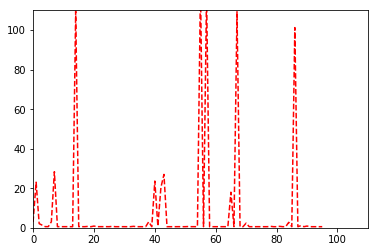

In [17]:
## Plot loss and accuracy por more episodes in order to see if the reward increases 
## The reward seems to be the same but the loss function gets smaller 

episodes = list(range(0, 96))

loss_Sarsa_Bolzman = [2.938,23.077,2.101,1.326,0.585,0.585,3.030,28.383,0.573,
                      0.566,0.571,0.579,0.571,0.566,109.56,0.5706,0.5656,0.564,
                     0.704,0.556,0.868,0.568,0.579,0.571,0.574,0.561,0.713,0.559,
                     0.553,0.568,0.567,0.557,0.573,0.735,0.562,0.566,0.550,0.565,
                     3.034,0.565,23.642,0.869,20.407,27.008,0.562,0.555,0.561,0.558,
                     0.570,0.553,0.565,0.641,0.568, 0.572,0.571,121.95,0.559,118.69,
                     0.556,0.558,0.556,0.560,0.562,0.565,0.567,18.003,0.565,109.29,
                     0.561,0.572,2.371,0.573,0.555,0.556,0.569,0.557,0.555,0.563, 0.740,
                     0.556,0.553,0.734,0.562,0.559,2.77,0.557,101.28,0.554,1.088,0.568,
                     0.880,0.570,0.555,0.559,0.557,0.561]

plt.plot(episodes, loss_Sarsa_Bolzman, 'r--')
plt.axis([0, 110, 0, 110])
plt.show()



# Conclusion State-Action-Reward agent

#### The State-action-Reward agent with Neural Network model and  Boltzmann Gumbel Q Policy
#### No change in comparassion with the other model 

In [7]:
# Next, we build a neural network model
model2 = Sequential()
model2.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model2.add(Dense(300, activation= 'tanh')) # layer 1: 3 cells with tanh activation function 
model2.add(Dense(nb_actions))
model2.add(Dense(600, activation= 'sigmoid')) #layer 2 : 6 cells with sigmoid activation function 
model2.add(Dense(nb_actions))
model2.add(Dense(600, activation= 'sigmoid')) #layer 3 : 6 cells with sigmoid activation function  
model2.add(Dense(nb_actions))
model2.add(Dense(600, activation= 'sigmoid')) #layer 4 : 6 cells with sigmoid activation function  
model2.add(Dense(nb_actions))
model2.add(Dense(300, activation= 'tanh')) #layer 5 : 3 cells with tanh activation function  
model2.add(Dense(nb_actions))
model2.add(Dense(300, activation= 'sigmoid')) #layer 6 : 6 cells with sigmoid activation function  
model2.add(Dense(nb_actions))
model2.add(Activation('softmax')) # one layer of 1 unit with sigmoid activation function
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 100800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               30240300  
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 2709      
_________________________________________________________________
dense_3 (Dense)              (None, 600)               6000      
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 5409      
_________________________________________________________________
dense_5 (Dense)              (None, 600)               6000      
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 5409      
__________

### Q-Learning

#### Linnear annealining is a technique for aproximating the global optimum of a given function
#### https://en.wikipedia.org/wiki/Simulated_annealing

In [21]:
#DQN -- Deep Reinforcement Learning 
#Configure and compile the agent. 

# Select a policy. We use eps-greedy action selection, which means that a random action is selected
# with probability eps. We anneal eps from 1.0 to 0.1 over the course of 1M steps. This is done so that
# the agent initially explores the environment (high eps) and then gradually sticks to what it knows
# (low eps). We also set a dedicated eps value that is used during testing. Note that we set it to 0.05
# so that the agent still performs some random actions. This ensures that the agent cannot get stuck.
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05,
                              nb_steps=1000000)


memory = SequentialMemory(limit=1000000, window_length=1)
dqn2 = DQNAgent(model=model2, nb_actions=nb_actions, memory=memory, nb_steps_warmup=50,
              target_model_update=1e-2, policy=policy)
dqn2.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])



In [25]:
import os.path
file_path = 'dqn_backup_weights.h5f'
if os.path.exists(file_path):
    dqn2.load_weights(file_path)

In [26]:
from rl.callbacks import Callback

class Saver(Callback):
    def on_episode_end(self, episode, logs={}):
        print('episode callback')
        if episode % 1 == 0:
            self.model.save_weights('dqn_backup_weights.h5f', overwrite=True)

In [ ]:
s = Saver()
dqn2.fit(env, nb_steps=100000,callbacks=[s] , visualize=False, verbose=2)
#dqn2.test(env, nb_episodes=10, visualize=True)

Training for 100000 steps ...
episode callback
   658/100000: episode: 1, duration: 336.758s, episode steps: 658, steps per second: 2, episode reward: 290.000, mean reward: 0.441 [0.000, 10.000], mean action: 3.857 [0.000, 8.000], mean observation: 72.810 [0.000, 228.000], loss: 2.103166, mean_absolute_error: 0.148895, acc: 0.111409, mean_q: 0.205358, mean_eps: 0.999681
episode callback
  1086/100000: episode: 2, duration: 237.365s, episode steps: 428, steps per second: 2, episode reward: 70.000, mean reward: 0.164 [0.000, 10.000], mean action: 3.928 [0.000, 8.000], mean observation: 72.885 [0.000, 228.000], loss: 2.026317, mean_absolute_error: 0.149495, acc: 0.114559, mean_q: 0.213103, mean_eps: 0.999216
episode callback
  1718/100000: episode: 3, duration: 342.532s, episode steps: 632, steps per second: 2, episode reward: 190.000, mean reward: 0.301 [0.000, 10.000], mean action: 4.198 [0.000, 8.000], mean observation: 72.871 [0.000, 228.000], loss: 1.937029, mean_absolute_error: 0.15

In [ ]:
dqn2.fit(env, nb_steps=1000000, visualize=True, verbose=2)
dqn2.test(env, nb_episodes=10, visualize=True)

Training for 1000000 steps ...
    654/1000000: episode: 1, duration: 317.012s, episode steps: 654, steps per second: 2, episode reward: 120.000, mean reward: 0.183 [0.000, 10.000], mean action: 3.887 [0.000, 8.000], mean observation: 72.928 [0.000, 228.000], loss: 1.448611, mean_absolute_error: 0.186551, acc: 0.101472, mean_q: 0.763487, mean_eps: 0.999683
   1336/1000000: episode: 2, duration: 352.722s, episode steps: 682, steps per second: 2, episode reward: 260.000, mean reward: 0.381 [0.000, 10.000], mean action: 3.708 [0.000, 8.000], mean observation: 72.801 [0.000, 228.000], loss: 1.389616, mean_absolute_error: 0.164051, acc: 0.099203, mean_q: 0.545559, mean_eps: 0.999105
   2407/1000000: episode: 3, duration: 548.344s, episode steps: 1071, steps per second: 2, episode reward: 710.000, mean reward: 0.663 [0.000, 200.000], mean action: 4.073 [0.000, 8.000], mean observation: 72.658 [0.000, 228.000], loss: 10.424305, mean_absolute_error: 0.192876, acc: 0.112803, mean_q: 0.673903, m